# Import Libraries

In [223]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Loading the dataset into a dataframe

In [224]:
df = pd.read_csv('/kaggle/input/salary-prediction-data-simple-linear-regression/Salary Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# Preaparing the training and test dataset

In [225]:
data = np.asarray(df) #Converting the dataset into a numpy array


y_train = data[0:14,-1] #All row last column 
x_train = data[0:14,0:1] #All row first two columns

y_test = data[15:,-1] #All row last column 
x_test = data[15:,0:1] #All row first two columns

m,c = x_train.shape
print('Total row: {0}\nColumn: {1}'.format(m,c))

Total row: 14
Column: 1


# Linear Regression

In [226]:
class LinearRegression:
    """
    Simple linear regression model that uses gradient descent to fit the model to the data.
    
    Attributes:
    x_train (ndarray): Training features, shape (n_samples, n_features).
    y_train (ndarray): Training labels, shape (n_samples,).
    iteration (int): Number of iterations for the gradient descent.
    alpha (float): Learning rate for gradient descent.
    """
    
    def __init__(self, x_train, y_train, iteration, alpha):
        """
        Initializes the LinearRegression model with training data, number of iterations, and learning rate.
        
        Parameters:
        x_train (ndarray): Training features.
        y_train (ndarray): Training labels.
        iteration (int): Number of iterations for the gradient descent.
        alpha (float): Learning rate.
        """
        self.x_train = x_train
        self.y_train = y_train
        self.iteration = iteration
        self.alpha = alpha
        
    def compute_gradient(self, y_predicted):
        """
        Computes the gradients of the cost function with respect to the model parameters.
        
        Parameters:
        y_predicted (ndarray): Predicted labels based on the current model parameters.
        
        Returns:
        tuple: The gradient with respect to weights (dw) and the gradient with respect to bias (db).
        """
        m = self.x_train.shape[0]
        dw = (1/m) * np.dot(self.x_train.T, (y_predicted - self.y_train))
        db = (1/m) * np.sum(y_predicted - self.y_train)
        return dw, db

    def compute_cost(self, y_predicted):
        """
        Computes the cost function for the linear regression model.
        
        Parameters:
        y_predicted (ndarray): Predictions made by the model.
        
        Returns:
        float: The cost associated with the current model parameters.
        """
        m = self.y_train.size
        J = np.sum((y_predicted - self.y_train) ** 2) / (2 * m)
        return J

    def gradient_descend(self):
        """
        Performs gradient descent to optimize the model parameters.
        
        Returns:
        ndarray: The optimized weights.
        float: The optimized bias.
        list: History of the cost function values.
        list: History of the weights.
        list: History of the biases.
        """
        m, c = self.x_train.shape
        W = np.zeros(c)
        b = 0

        J_history = []
        W_history = []
        B_history = []

        for i in range(self.iteration):
            y_predicted = np.dot(self.x_train, W) + b
            J = self.compute_cost(y_predicted)
            dw, db = self.compute_gradient(y_predicted)

            W -= self.alpha * dw
            b -= self.alpha * db

            J_history.append(J)
            W_history.append(W)
            B_history.append(b)

        return W, b, J_history, W_history, B_history
    
    def predict(self, x_test):
        """
        Makes predictions using the linear regression model.
        
        Parameters:
        x_test (ndarray): Test features.
        
        Returns:
        ndarray: Predictions for the test data.
        """
        W, b, _, _, _ = self.gradient_descend()
        return np.dot(x_test, W) + b
    
    def evaluate(self, y_predicted, y_test):
        """
        Evaluates the model using mean squared error.
        
        Parameters:
        y_predicted (ndarray): Predictions made by the model.
        y_test (ndarray): Actual labels.
        
        Returns:
        float: Mean squared error of the predictions.
        """
        return np.mean((y_predicted - y_test) ** 2)
    
    def r_squared(self, y_predicted, y_test):
        """
        Calculates the coefficient of determination, R^2, of the prediction.
        
        Parameters:
        y_predicted (ndarray): Predictions made by the model.
        y_test (ndarray): Actual labels.
        
        Returns:
        float: The R^2 score.
        """
        ss_res = np.sum((y_test - y_predicted) ** 2)
        ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
        return 1 - (ss_res / ss_tot)


# Model building

In [227]:
lr = linearregression(x_train,y_train,1000,.01 )
W,B,J_history,W_history,B_history = lr.gradient_descend()

In [228]:
y_predicted  = lr.predict(x_test)
lr.evaluate(y_predicted,y_test)
lr.r_squared(y_predicted,y_test)

0.8901383345269578

# Parameters Exploration

In [248]:
data = []
for i in range(len(J_history)):
    # Initialize iteration data with iteration number, cost, and bias
    iteration_data = {
        'Iteration': i,
        'Cost': J_history[i],
        'Bias': B_history[i],
    }
    
    # Dynamically add each weight to the iteration data
    for weight_index, weight_value in enumerate(W_history[i]):
        iteration_data[f'Weight_{weight_index}'] = weight_value
    
    # Append the iteration data to the overall data list
    data.append(iteration_data)
df_parameters = pd.DataFrame(data)

# Display the first few rows of the dataframe to check
df_parameters.head()


,Iteration,Cost,Bias,Weight_0
0,0,1.407796e+09,523.297143,1573.639929
1,1,1.146734e+09,996.287771,2986.628276
2,2,9.359751e+08,1424.076469,4255.276563
3,3,7.658229e+08,1811.249568,5394.240237
4,4,6.284507e+08,2161.927763,6416.686809


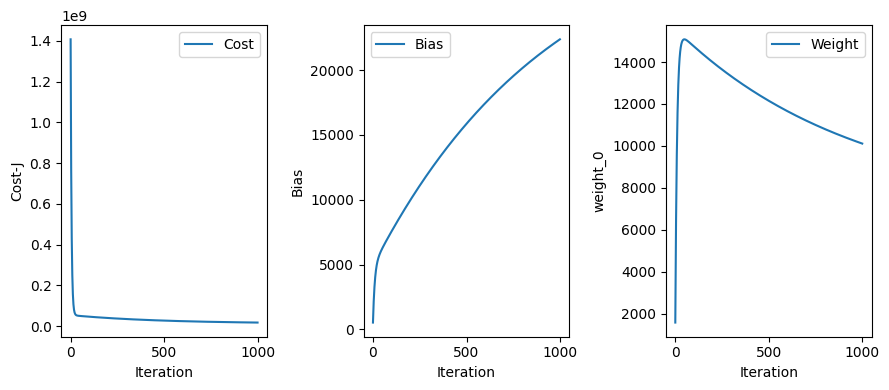

In [268]:
plt.figure(figsize = (9,4))
plt.subplot(1,3,1)
plt.plot(df_parameters.Iteration, df_parameters.Cost, label = 'Cost')
plt.legend(loc = 'best')
plt.xlabel('Iteration')
plt.ylabel('Cost-J')

plt.subplot(1,3,2)
plt.plot(df_parameters.Iteration, df_parameters.Bias, label = 'Bias')
plt.legend(loc = 'best')
plt.xlabel('Iteration')
plt.ylabel('Bias')
plt.subplot(1,3,3)
plt.plot(df_parameters.Iteration, df_parameters.Weight_0, label = 'Weight')
plt.legend(loc = 'best')
plt.xlabel('Iteration')
plt.ylabel('weight_0')
plt.tight_layout()
plt.show()